# Capstone Project : 1

# Project ID : PRCP-1010-InsClaimPred

# Project Team ID : " PTID-CDS-JUN-24-1966"

# Problem Statement

The challenge is to predict Insurance claim payments using multiple algorithms. 

Task 1:-Create a predictive model which will help the insurance marketing team to know which customer will buy the product.

Task 2:-Suggestions to the Insurance market team to make customers buy the product.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


# Basic checks

In [4]:
data.shape

(595212, 59)

In [5]:
pd.set_option("display.max_columns",None)


In [6]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [7]:
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [8]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
data.target.unique()

array([0, 1], dtype=int64)

In [11]:
data.target.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [12]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

# EDA

#Skipping the EDA as mentioned in the word document(Due to privacy concerns, the company has not shared the names of the features. You can skip the EDA part and move directly towards the modelling.)

# Data Preprocessing

In [13]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [14]:
data.duplicated().sum()

0

# Checking Outliers

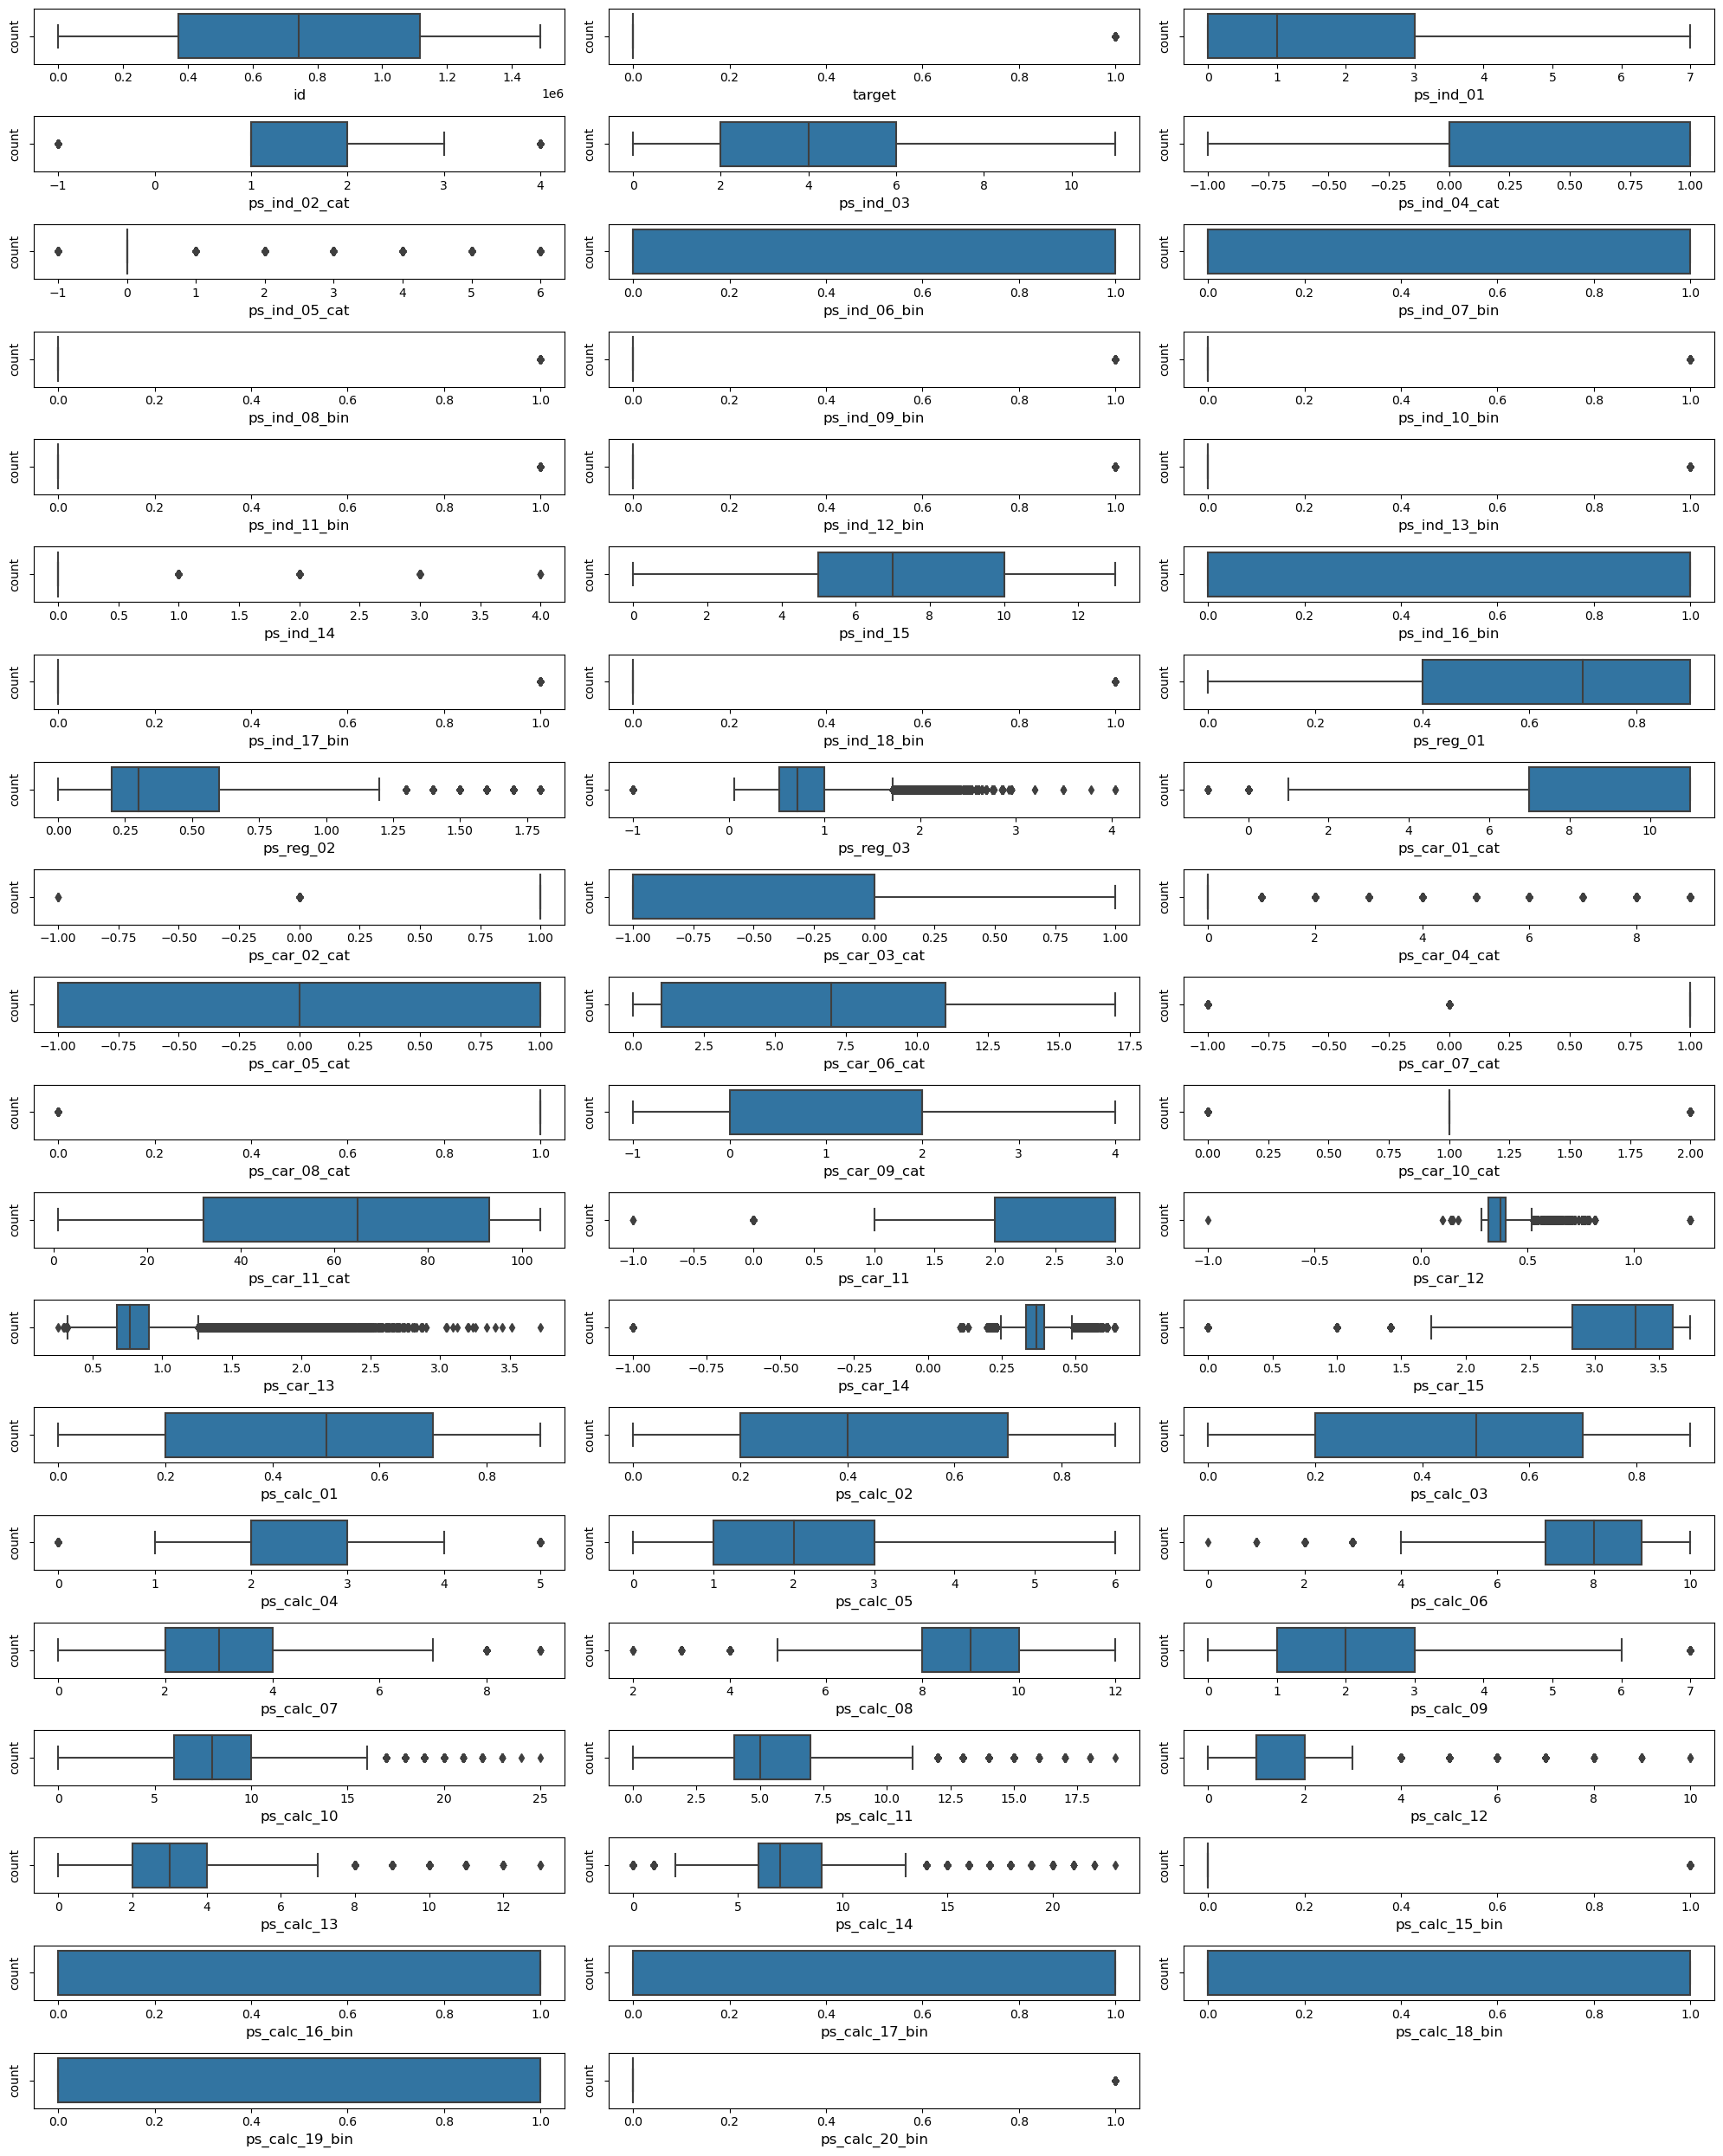

In [15]:
#boxblot
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=59:
        ax=plt.subplot(20,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=12)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Find Outliers Using IQR Method

In [16]:
def calculate_outliers(df):
    outlier_percentage ={}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage[column] = (len(outliers) / len(df))* 100
    return pd.Series(outlier_percentage)
    
#num_outliers = data.columns
#outlier_stats = data[num_outliers].apply(calculate_outliers)
outlier_info=calculate_outliers(data)
print(outlier_info)


id                 0.000000
target             3.644752
ps_ind_01          0.000000
ps_ind_02_cat      1.947877
ps_ind_03          0.000000
ps_ind_04_cat      0.000000
ps_ind_05_cat     11.290599
ps_ind_06_bin      0.000000
ps_ind_07_bin      0.000000
ps_ind_08_bin     16.392143
ps_ind_09_bin     18.530372
ps_ind_10_bin      0.037298
ps_ind_11_bin      0.169183
ps_ind_12_bin      0.943865
ps_ind_13_bin      0.094756
ps_ind_14          1.071887
ps_ind_15          0.000000
ps_ind_16_bin      0.000000
ps_ind_17_bin     12.108123
ps_ind_18_bin     15.344617
ps_reg_01          0.000000
ps_reg_02          6.181495
ps_reg_03         20.306210
ps_car_01_cat      1.009892
ps_car_02_cat     17.006042
ps_car_03_cat      0.000000
ps_car_04_cat     16.570734
ps_car_05_cat      0.000000
ps_car_06_cat      0.000000
ps_car_07_cat      7.067062
ps_car_08_cat     16.792000
ps_car_09_cat      0.000000
ps_car_10_cat      0.845581
ps_car_11_cat      0.000000
ps_car_11          4.366175
ps_car_12          2

INSIGHTS
There are many outliers in the dataset.
Replace the outlier with median values

# Handle Outliers

In [17]:
# Replace outliers with the median
replace_outliers = data.copy()
for columns in data.columns:
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    outlier = (data[columns] < lower[columns]) | (data[columns] > upper[columns])
    replace_outliers.loc[outlier, columns] = data[columns].median()

# Print the updated DataFrame
print(replace_outliers)

               id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7.0       0          2              2          5              1   
1             9.0       0          1              1          7              0   
2            13.0       0          5              1          9              1   
3            16.0       0          0              1          2              0   
4            17.0       0          0              2          0              1   
...           ...     ...        ...            ...        ...            ...   
595207  1488013.0       0          3              1         10              0   
595208  1488016.0       0          5              1          3              0   
595209  1488017.0       0          1              1         10              0   
595210  1488021.0       0          5              2          3              1   
595211  1488027.0       0          0              1          8              0   

        ps_ind_05_cat  ps_i

In [18]:
data.drop("id",axis=1,inplace=True)
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data.drop("target",axis=1))

In [20]:
data1

array([[ 0.0502179 ,  0.9645855 ,  0.21359383, ..., -0.63472992,
        -0.73222528,  2.34997253],
       [-0.45386836, -0.54009356,  0.95436209, ..., -0.63472992,
         1.36569991, -0.42553689],
       [ 1.56247669,  3.9739436 ,  1.69513035, ..., -0.63472992,
         1.36569991, -0.42553689],
       ...,
       [-0.45386836, -0.54009356,  2.06551448, ..., -0.63472992,
        -0.73222528, -0.42553689],
       [ 1.56247669,  0.9645855 , -0.52717443, ...,  1.57547323,
        -0.73222528, -0.42553689],
       [-0.95795462, -0.54009356,  1.32474622, ..., -0.63472992,
        -0.73222528, -0.42553689]])

In [21]:
## creating new dataframe
new_data =pd.DataFrame(data=data1, columns= ['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'])

In [22]:
new_data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.050218,0.964585,0.213594,1.182227,-0.299997,-0.805893,1.700163,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.043440,-1.395821,2.694238,-0.425746,0.309442,-0.591654,0.210419,0.679380,0.452653,-0.627780,-0.336757,1.371044,-0.464486,0.259209,-2.226032,-1.357747,0.085839,-1.521114,-0.415678,0.343841,0.313526,0.264742,0.737869,0.523136,0.175713,-0.870090,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,-0.453868,-0.540094,0.954362,-0.844892,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,-1.212598,-1.395821,-0.371162,2.348817,0.657096,-0.096928,0.270919,1.078061,0.452653,-0.627780,-0.336757,-0.997456,0.807908,0.259209,0.449230,0.685684,0.085839,-1.309073,0.785455,-1.092413,-0.865800,0.314877,-0.842820,-0.521440,-1.218534,-0.521844,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,1.562477,3.973944,1.695130,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.325445,0.716424,-0.371162,-0.425746,-2.124135,-1.086380,-1.954747,-0.516665,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,0.449230,0.685684,0.085839,-0.067116,-1.616811,-1.092413,-0.764418,0.198847,0.342818,0.174944,0.872836,-1.218337,-0.333042,0.100547,0.982196,-1.417981,-0.839850,-0.271891,-0.493559,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,-0.957955,-0.540094,-0.897559,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.197425,0.716424,-0.371162,-0.425746,1.004750,-0.591654,0.037612,-0.516665,0.452653,0.640204,-0.336757,1.371044,0.807908,0.259209,0.449230,1.707399,0.085839,1.265715,-1.616811,-0.099081,-1.203608,0.052362,-1.457410,0.523136,1.569960,-1.218337,-0.333042,1.862777,-0.516705,-1.417981,-0.839850,1.332025,-2.214970,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,-0.957955,0.964585,-1.638327,1.182227,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.479430,0.716424,-0.371162,-0.425746,0.309442,0.397799,0.365035,1.078061,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,0.449230,0.685684,0.085839,0.599299,0.785455,-1.095124,-1.101721,0.248762,-1.457410,-0.173248,0.524274,-1.566584,-0.333042,0.100547,-1.266155,-0.004117,0.530322,-0.271891,1.227851,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0.554304,-0.540094,2.065514,-0.844892,-0.299997,-0.805893,-0.588179,-0.442786,2.096794,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.607449,0.716424,-0.371162,-0.425746,-0.385866,-0.344291,0.178598,0.679380,0.452653,-0.627780,-0.336757,1.371044,-1.009797,0.259209,0.449230,-1.357747,0.085839,-0.9455

In [23]:
##Find correlation
new_data.corr()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
ps_ind_01,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000270,8.255181e-04,0.001028,0.002626,-0.000151,-0.002776,0.000487,1.272742e-04,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,-0.000636,-0.001831,0.001313,-0.001013,0.012326,0.004315,0.007163,-0.008252,-0.017836,-0.009124,-0.019510,-0.036213,0.012879,-0.011399,-0.010873,-0.006562,-0.007230,0.053777,-0.002084,-0.008334,0.002168,-0.002250,0.001076,-0.016302,-0.015259,-0.001427,-0.006629,-0.001739,0.002379,-0.001560,1.291697e-03,-0.000642,-0.000249,-0.001902,-0.000145,-0.000822,-1.069873e-03,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,-0.384345,-0.008978,-0.005229,-0.017499,-0.008390,-0.018334,0.016406,0.028352,-0.037121,-0.011751,-0.020750,-0.183432,-0.096757,-0.075546,0.136383,-0.075723,-0.187017,-0.164890,-0.059887,0.038994,0.038313,0.099184,-0.041057,-0.031296,0.019618,-0.218117,-0.272210,-0.005695,-0.165981,0.000183,-0.000318,0.002859,-4.089715e-04,-0.000501,-0.001413,-0.001553,-0.001164,-0.001955,-1.197098e-03,0.00

# PCA

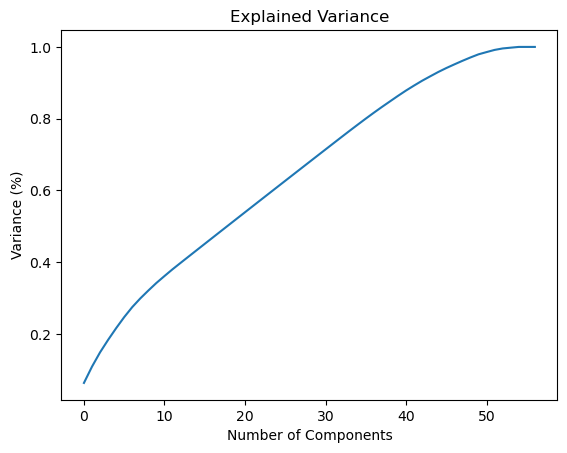

In [24]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(new_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Insights:
    
    From the diagram above, it can be seen that 4 principal components explain almost 75% of the variance in data and 5 principal components explain around 98% of the variance in data.
    
    For 1 pc, we are getting around 5% of the variance

    For 2 pc, we are getting around 38% of the variance

    For 3 pc, we are getting around 50% of the variance

    For 4 pc, we are getting around 75% of the variance

    For 5 pc, we are getting around 90% of the variance

So, instead of giving all the columns as input, only feed these 5 principal components of the data to the machine learning algorithm and obtain a similar result.

In [25]:
pca=PCA(n_components=5)
df=pca.fit_transform(new_data)
principal_df=pd.DataFrame(data=df,columns=["pc1","pc2","pc3","pc4","pc5"])

In [26]:
principal_df.head()

,pc1,pc2,pc3,pc4,pc5
0,1.367652,-0.008926,-0.402791,-0.084045,-0.498679
1,-0.870513,1.000760,0.878102,-1.002063,-2.048213
2,-1.775785,-0.766957,-1.229868,3.067636,0.545695
3,-1.652709,0.135345,0.488912,0.112868,0.496609
4,-1.910489,-0.430477,1.582383,-1.332293,0.829082


In [27]:
pca.explained_variance_ratio_

array([0.06357069, 0.04538662, 0.03983963, 0.0347846 , 0.03263942])

Here, we see that earlier we had 57 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 5. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.

# Model Creation

In [28]:
x=principal_df
y=data.target

In [29]:
y.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

##Insight
Here we are seeing the data is imbalanced. So we are using SMOTE technique for balancing the data.

In [31]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print("Before Sampling :",Counter(y_train))# checking count for each class
x_sm,y_sm=sm.fit_resample(x_train,y_train)#applying sampling on target variable
print("After Sampling :",Counter(y_sm))

Before Sampling : Counter({0: 430214, 1: 16195})
After Sampling : Counter({0: 430214, 1: 430214})


In [32]:
x_train.shape

(446409, 5)

In [33]:
y_train.shape

(446409,)

In [34]:
y_sm.value_counts()

target
0    430214
1    430214
Name: count, dtype: int64

# 1. Logistic regression

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_sm,y_sm) 

LogisticRegression(max_iter=1000)

In [37]:
#make prediction using x_test
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# Model Evaluation

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report,roc_auc_score

In [39]:
confusion_matrix(y_test,y_pred)

array([[67565, 40101],
       [52035, 55406]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred)

0.5716736321923508

In [41]:
precision_score(y_test,y_pred)

0.5801250170144596

In [42]:
recall_score(y_test,y_pred)

0.5156876797498162

In [43]:
f1_score(y_test,y_pred)

0.5460117862703747

In [44]:
roc_auc_score(y_test, y_pred)

0.571615132576411

In [45]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.56      0.63      0.59    107666
           1       0.58      0.52      0.55    107441

    accuracy                           0.57    215107
   macro avg       0.57      0.57      0.57    215107
weighted avg       0.57      0.57      0.57    215107



# 2. Decision Tree Algorithm

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random', random_state=None)
dt.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [90]:
y_pred1=dt.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [91]:
acc = accuracy_score(y_test,y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print("Accuracy",acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy 0.5863686444420684
Precision: 0.58203756686155
Recall: 0.6096927616086969
F1 Score: 0.5955442821621278


In [92]:
confusion_matrix(y_test,y_pred1)

array([[60626, 47040],
       [41935, 65506]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58    107666
           1       0.58      0.61      0.60    107441

    accuracy                           0.59    215107
   macro avg       0.59      0.59      0.59    215107
weighted avg       0.59      0.59      0.59    215107



# 3. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

## Hyperparameter Tuning

In [52]:
# Best parameters for Random Forest
best_params_rf = {
 'n_estimators': 744,
 'max_depth': 26,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'
}
# Create and train the model
rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
rf_classifier.fit(x_sm,y_sm)

RandomForestClassifier(max_depth=26, min_samples_split=12, n_estimators=744,
                       random_state=42)

In [74]:
y_predict=rf_classifier.predict(x_test)

In [75]:
y_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

## Model Evaluation

In [77]:
confusion_matrix(y_test,y_predict)

array([[106111,   1555],
       [   605, 106836]], dtype=int64)

In [79]:
acc = accuracy_score(y_test,y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Accuracy",acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy 0.989958485776846
Precision: 0.985653790443856
Recall: 0.9943690025223145
F1 Score: 0.9899922161681308


In [78]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    107666
           1       0.99      0.99      0.99    107441

    accuracy                           0.99    215107
   macro avg       0.99      0.99      0.99    215107
weighted avg       0.99      0.99      0.99    215107



# 4. KNN Algorithm

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred2=model_knn.predict(x_test)

In [63]:
y_pred2

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

## Model Evaluation

In [65]:
confusion_matrix(y_test,y_pred2)

array([[ 96846,  10820],
       [   185, 107256]], dtype=int64)

In [80]:
acc = accuracy_score(y_test,y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy",acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy 0.9488394148028656
Precision: 0.9083641044750839
Recall: 0.9982781247382284
F1 Score: 0.9512010181050653


In [66]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    107666
           1       0.91      1.00      0.95    107441

    accuracy                           0.95    215107
   macro avg       0.95      0.95      0.95    215107
weighted avg       0.95      0.95      0.95    215107



# 5. Gradient Boosting Machines

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

## Hyperparameter tuning

In [81]:
#Best parameters for Gradient Boosting
best_params_gb = {
 'n_estimators': 618,
 'learning_rate': 0.1851561046543922,
 'max_depth': 3,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'subsample': 0.7301321323053057,
 'max_features': 'log2'
}

In [83]:
model_gb=GradientBoostingClassifier(**best_params_gb,random_state=42)
model_gb.fit(x_sm,y_sm)

GradientBoostingClassifier(learning_rate=0.1851561046543922,
                           max_features='log2', min_samples_split=4,
                           n_estimators=618, random_state=42,
                           subsample=0.7301321323053057)

In [84]:
y_pred3=model_gb.predict(x_test)

In [85]:
y_pred3

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

# Model Evaluation

In [87]:
confusion_matrix(y_test,y_pred3)

array([[64020, 43646],
       [39900, 67541]], dtype=int64)

In [94]:
acc = accuracy_score(y_test,y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

print("Accuracy",acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy 0.6116072466260977
Precision: 0.6074541088436598
Recall: 0.6286333894881843
F1 Score: 0.6178623049197725


In [95]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61    107666
           1       0.61      0.63      0.62    107441

    accuracy                           0.61    215107
   macro avg       0.61      0.61      0.61    215107
weighted avg       0.61      0.61      0.61    215107



# Project Outcomes

# Accuracy

* Logistic regression - 57
* Decision Tree Algorithm - 59
* Random Forest - 99
* KNN Algorithm - 95
* Gradient Boosting Machines - 61

# Insights:

* The best accuracy model dom is Random Forest, with an accuracy of 99%. However, it's important to consider the potential for overfitting with such high accuracy. Therefore, while Random Forest has the highest accuracy, it may require additional evaluation and validation to ensure its robustness.
* The K Nearest Neighbors(KNN) algorithm performed the also best with an accuracy of 95% on the current dataset.Except Logistic Regression, decision tree algorithm and Gradient Boosting, most of the algorithms perform well.

# Conclusions

* The Dataset was large totally around 595212  samples and the dataset has no null values and no duplicate values.


* Feature Extraction was carried out using PCA technique and appropriate features were shortlisted.


* The samples were highly imbalanced, Hence SMOTE Technique was applied on the data to balance the classes.


* Testing multiple algorithms with model evaluation metrics gave us some understanding on the model performance for various algorithms on this specific dataset.

* **Best Accuracy model among the given algorithm models are Random Forest and KNN algorithms**

* The best accuracy model is Random Forest, with an accuracy of 99% on the current dataset.


* The K Nearest Neighbors(KNN) algorithm performed the also best with an accuracy 95% on the current dataset.


# Task 2:-Suggestions to the Insurance market team to make customers buy the product.

* Develop informative content that explains the importance  of insurance, how it works and its benefits to the customer.

* Sharing the information use blogs, videos, webinars in social media,

* Provide clear and concise policy details including coverage, exclusions and claim process and also ensure that the insurance product is easy to understand.

* Create user friendly website with an easy to navigate interface and quick access to information

* Offer discounts for bundled products, long term policies or for customer who meet certain criteria.

* Provide excellent customer service to address queries and concern promptly.

* Use Analytics to predict customer needs and present customized solutions

# Report on Challenges faced 

* Feature engineering part :- Handling many features can be difficult to find which is important. Its done by using correlation matrices but also it becomes complicated due to lot of columns and its takes a long time.

* Hyperparameter Tuning :- Doing Hyperparameter is important task then only we can find the best combinations which gives good score if we perform grid Search CV and random Search CV but its take a long time to implement.  


* Model Creation:- Trying to make all the model its consuming lot of computer power. Its still in loading stage and consuming more time to implement the model. 